# Задача N сычей

ТЫ ХОРОШО РАЗБИРАЕШЬСЯ В МАТЕМАТИКЕ

@

ЕРОХИН ПОПРОСИЛ СПИСАТЬ ДЗ

@

ДАЁШЬ

@

ПОДОШЛА ЕОТОВА И УВИДЕЛА СДЕЛАННОЕ ДОМАШНЕЕ ЗАДАНИЕ У ЕРОХИНА

@

ОЙ, ВАНЕЧКА, КАКОЙ ТЫ МОЛОДЕЦ, САМ СДЕЛАЛ И ВСЕ ПРАВИЛЬНО ! ВОТ КТО НАСТОЯЩИЙ МАТЕМАТИК У НАС, НЕ ТО ЧТО СЛАВА СЫЧЕВ, КОТОРЫЙ ЭЛЕМЕНТАРНОЕ УРАВНЕНИЕ РЕШИТЬ НЕ МОЖЕТ

@

УЛЕТАЕШЬ КОЛОНИЗИРОВАТЬ МАРС

![yoba](https://pbs.twimg.com/profile_images/711191622076207105/1thZNajc_400x400.jpg)

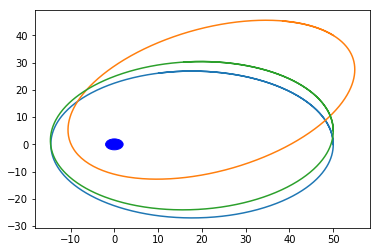

In [23]:
%matplotlib inline

import numpy
import numpy.linalg
import matplotlib.pyplot as plt

G = 50.0  # гравитационная постоянная
collision_distance = 3.0  # всё-таки это не точки
model_delta_t = 0.01
time_to_model = 10

class MaterialPoint:
    """Материальная точка, движущаяся по двумерной плоскости"""
    
    def __init__(self, mass: 'float', position: 'numpy.array', velocity: 'numpy.array'):
        # Аннотации типов по желанию, но могут помочь IDE и компилятору, когда таковые имеются
        self.mass = mass
        self.position = position
        self.velocity = velocity
    
    @staticmethod
    def gravity_dencity(dist: 'float')-> 'float':
        if dist > collision_distance:
            return G / dist ** 2
        else:
            return -G / dist ** 3 # будем считать, что отскакивают точки друг от друга резко, но стараться не допускать этого
    
    def force_induced_by_other(self, other: 'MaterialPoint')-> 'numpy.array':
        delta_p = other.position - self.position
        distance = numpy.linalg.norm(delta_p)  # Евклидова норма (по теореме Пифагора)
        force_direction = delta_p / distance
        force = force_direction * self.mass * other.mass * self.gravity_dencity(distance)
        return force
    
    def advance(self):
        # print(self.position)
        self.position += self.velocity * model_delta_t

    def apply_force(self, force: 'numpy.array'):
        # print(force)
        self.velocity += force * model_delta_t / self.mass


buhurt_quantum = 20 # Квант бугурта
dm = 0.1 # Потеря массы
m_min = 5 # Масса сгораня

def достаточно(f):
    def func(self):
        if hasattr(self,"buhurt_time"):
            self.buhurt_time += buhurt_quantum
        else:
            self.buhurt_time = buhurt_quantum
        f(self)
    return func

class ТИПИЧНЫЙ_СЛАВИК(MaterialPoint):
    
    def __init__(self, mass: 'float', position: 'numpy.array', velocity: 'numpy.array'):
        super(ТИПИЧНЫЙ_СЛАВИК,self).__init__(mass, position, velocity)
        self.buhurt_time = 0
    
    def apply_force(self, force: 'numpy.array'):
        v = numpy.linalg.norm(self.velocity)
        pukan_direction = self.velocity / v
        if self.buhurt_time > 0:
            force += self.velocity * dm / model_delta_t # Скорость, с которой вылетает топливо, мала
            self.buhurt_time -= 1
            self.mass -= dm
        self.velocity += force * model_delta_t / self.mass
    
    def НЕ_СГОРЕЛ(self):
        return self.mass > m_min
    
    def advance(self):
        if self.НЕ_СГОРЕЛ():
            self.position += self.velocity * model_delta_t

# --------------------Меняйте код ниже--------------------

centrum = MaterialPoint(500.0, numpy.array([0.0, 0.0]), numpy.array([0.0, 0.0]))
ЗЕМЛЯ = MaterialPoint(10.0, numpy.array([50.0, 0.0]), numpy.array([0.0, 15.0]))
МАРС = MaterialPoint(10.0, numpy.array([50.0, 40.0]), numpy.array([-7.0, 7.0]))
ТЫ = ТИПИЧНЫЙ_СЛАВИК(10.0, numpy.array([50.0, 5.0]), numpy.array([0.0, 15.0]))

def model_step():
    ЗЕМЛЯ.apply_force(ЗЕМЛЯ.force_induced_by_other(centrum))
    МАРС.apply_force(МАРС.force_induced_by_other(centrum))
    ТЫ.apply_force(ТЫ.force_induced_by_other(centrum))

    ЗЕМЛЯ.advance()
    МАРС.advance()
    ТЫ.advance()

    

xs_1 = []
ys_1 = []
xs_2 = []
ys_2 = []
xs_3 = []
ys_3 = []
for stepn in range(int(time_to_model / model_delta_t)):
    xs_1.append(ЗЕМЛЯ.position[0])
    ys_1.append(ЗЕМЛЯ.position[1])
    xs_2.append(МАРС.position[0])
    ys_2.append(МАРС.position[1])
    xs_3.append(ТЫ.position[0])
    ys_3.append(ТЫ.position[1])
    model_step()

c = plt.Circle((0, 0), 2, color='b')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.add_patch(c)

plt.plot(xs_1,ys_1)
plt.plot(xs_2,ys_2)
plt.plot(xs_3,ys_3)

plt.show()

## Задание:

1. Придумать бугурт.
1. Взять код выше и смоделировать ситуацию для набора из произвольного количества тел (проверить для трёх, но использовать список).
1. Посмотреть, как изменится картина, когда тела начнут притягивать друг друга.
1. Написать функцию траленья, которая с помощью декоратора '@достаточно' будет подогревать Ваш пукан. Протральте себя и посмотрите на изменение траектории.
1. *Подберите такое траленье, чтобы, не догорев, долететь до Марса.*

|Номер задания|Балл|
|---|---|
|1|0.05|
|2|0.6|
|3|0.3|
|4|0.05|
|5|0.1|